<a href="https://colab.research.google.com/github/Venura-Shiromal/Ai-session-term1/blob/main/AI_MachineLearning/House%20Price%20Prediction/HousePricePrediction_RegressionModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prerequisites

In [180]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Loading Data

In [181]:
df = pd.read_csv("Housing.csv")

In [182]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# Preprocessing

## Mapping

In [183]:
df["furnishingstatus"].unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

In [184]:
map_YN = {
    "yes": 1,
    "no": 0
}

map_furnishing = {
    "furnished": 2,
    "semi-furnished": 1,
    "unfurnished": 0
}

In [185]:
yn_cols = ["mainroad","guestroom","basement","hotwaterheating","airconditioning","prefarea"]

df["furnishingstatus"] = df["furnishingstatus"].map(map_furnishing)

for col in yn_cols:
  df[col] = df[col].map(map_YN)

# Setting up data

In [186]:
x = df.drop('price', axis=1)
y = df['price']

### Feature Scaling

In [187]:
# scaler = StandardScaler()
# x = scaler.fit_transform(x)

# Train/Test Split

In [205]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=45)

## Model Setup

In [214]:
model = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())

# Model Training

In [215]:
model.fit(x_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearregression', LinearRegression())])

## Prediction

In [216]:
y_pred = model.predict(x_test)

# Evaluation

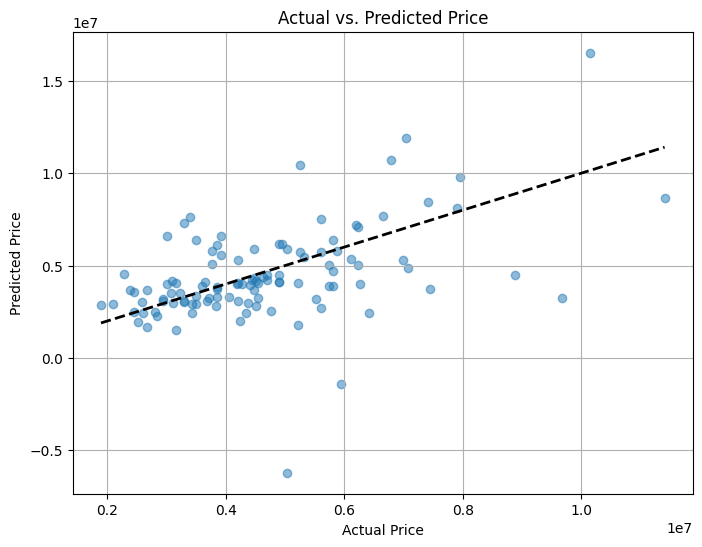

In [217]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs. Predicted Price")
plt.grid(True)
plt.show()